In [320]:
import time
start_time = float(time.time())

import pandas as pd

In [321]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [322]:
PREPARED_DATASET_PATH = 'prepared_COV_POL_dataset_2.csv'
PREPARED_DATASET_PATH_scalered = 'prepared_COV_POL_dataset_2_scalered.csv'

REPORTS_FILE_PATH = './reports/'
SCALER_FILE_PATH = './models/scaler.pkl'
MODEL_FILE_PATH = './models/model.pkl'

In [323]:
# Задаем имя колонки по которой будем делать обучение
# выбираем из целевых: 'Confirmed', 'Deaths','Recovered','Active','Day_increase_Recovered', 'Day_increase_Active', 'Day_increase_Deaths'
target_name = 'Day_increase_Deaths'

In [324]:
df = pd.read_csv(PREPARED_DATASET_PATH)

In [325]:
df.columns

Index(['Date', 'Absolute_time', 'Dugramm', 'Country_name', 'City', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Incident_rate', 'Case_fatality_ratio',
       'Lat', 'Long_', 'Main_key', 'Day_increase_Deaths',
       'Day_increase_Recovered', 'Day_increase_Active',
       'Specie_humidity_Count', 'Specie_humidity_Min', 'Specie_humidity_Max',
       'Specie_humidity_Median', 'Specie_humidity_Variance',
       'Specie_so2_Count', 'Specie_so2_Min', 'Specie_so2_Max',
       'Specie_so2_Median', 'Specie_so2_Variance', 'Specie_pm25_Count',
       'Specie_pm25_Min', 'Specie_pm25_Max', 'Specie_pm25_Median',
       'Specie_pm25_Variance', 'Specie_pressure_Count', 'Specie_pressure_Min',
       'Specie_pressure_Max', 'Specie_pressure_Median',
       'Specie_pressure_Variance', 'Specie_no2_Count', 'Specie_no2_Min',
       'Specie_no2_Max', 'Specie_no2_Median', 'Specie_no2_Variance',
       'Specie_co_Count', 'Specie_co_Min', 'Specie_co_Max', 'Specie_co_Median',
       'Specie_co_Variance',

In [326]:
# df.info()

In [327]:
columns = df.columns
feature_names = df[columns].select_dtypes(include=['float32', 'float16', 'int8', 'int16', 'int64', 'float64' ]).columns.tolist()
# feature_names

In [328]:
feature_names.remove(target_name)

In [329]:
df = df[feature_names + [target_name]]
df.head()

,Absolute_time,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Day_increase_Recovered,...,Specie_wind_speed_Min,Specie_wind_speed_Max,Specie_wind_speed_Median,Specie_wind_speed_Variance,Specie_wind_gust_Count,Specie_wind_gust_Min,Specie_wind_gust_Max,Specie_wind_gust_Median,Specie_wind_gust_Variance,Day_increase_Deaths
0,1609534800,127132,7578,0.0,119554.0,5640.639295,5.960734,40.710881,-73.816847,0.0,...,0.2,13.9,5.5,142.43,101.0,3.5,27.2,14.9,449.2300,0.0
1,1609534800,3629,83,0.0,3546.0,6537.796354,2.287131,34.267441,-78.658014,0.0,...,0.2,6.6,1.5,34.04,48.0,0.1,15.0,3.0,139.9200,0.0
2,1609534800,95401,2450,0.0,92951.0,6022.547069,2.568107,40.003385,-75.137927,0.0,...,0.1,8.1,2.5,29.01,76.0,0.5,22.7,7.7,293.6000,0.0
3,1609534800,5849,34,2858.0,2957.0,155.219999,0.581296,1.485400,103.761800,0.0,...,0.3,9.3,2.0,46.85,25.0,1.0,21.0,6.0,339.7700,0.0
4,1609534800,13945,23,9141.0,4781.0,784.131804,0.164934,3.139000,101.686900,0.0,...,0.3,4.1,1.0,5.28,66.0,0.5,12.3,5.0,76.3225,0.0


Нормализуем числовые данные (scaler)

In [330]:
# feature_names

In [331]:
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min)
# StandardScaler() Для каждой фичи х делает: (x - mean) / std
# RobustScaler() Для каждой фичи х делает: (x - median) / (q75 - q25)

scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names])

In [332]:
df[feature_names] = pd.DataFrame(stand_features, columns=feature_names)

In [333]:
df.describe()

,Absolute_time,Confirmed,Deaths,Recovered,Active,Incident_rate,Case_fatality_ratio,Lat,Long_,Day_increase_Recovered,...,Specie_wind_speed_Min,Specie_wind_speed_Max,Specie_wind_speed_Median,Specie_wind_speed_Variance,Specie_wind_gust_Count,Specie_wind_gust_Min,Specie_wind_gust_Max,Specie_wind_gust_Median,Specie_wind_gust_Variance,Day_increase_Deaths
count,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,...,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,2.157900e+04,21579.000000
mean,-7.143026e-15,-1.383856e-16,-1.812541e-15,-2.812881e-15,2.265157e-14,2.028829e-15,4.743619e-17,2.092646e-16,-8.356385e-17,-5.196973e-15,...,2.657675e-15,-1.941848e-15,-9.523253e-16,-3.200142e-17,-9.725770e-16,1.291705e-15,6.369621e-16,-7.879697e-15,1.964821e-15,12.757681
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,...,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,57.356692
min,-1.662768e+00,-3.922136e-01,-3.291899e-01,-1.807278e-01,-3.113991e-01,-1.046413e+00,-8.537974e-01,-4.094011e+00,-1.725372e+00,-4.193868e-01,...,-7.699475e-01,-1.659194e+00,-1.596689e+00,-9.952443e-01,-7.385135e-01,-4.905497e-01,-2.389663e+00,-1.637512e+00,-1.116097e+00,0.000000
25%,-8.522808e-01,-3.804445e-01,-3.259339e-01,-1.749567e-01,-2.784396e-01,-9.491012e-01,-4.622354e-01,-1.733212e-01,-9.940389e-01,-1.115090e-01,...,-6.187330e-01,-5.769394e-01,-6.721598e-01,-6.397538e-01,-4.238857e-01,-4.262239e-01,-4.429309e-01,-5.077121e-01,-5.078166e-01,0.000000
50%,-4.179395e-02,-2.836800e-01,-2.891805e-01,-1.744718e-01,-2.744887e-01,-2.575140e-01,-2.956097e-01,7.412439e-02,-7.842069e-02,-1.115090e-01,...,-4.675184e-01,-2.161879e-01,-2.759332e-01,-3.148241e-01,-3.007705e-01,-3.618982e-01,-1.059965e-01,-2.180197e-01,-2.237281e-01,0.000000
75%,7.686929e-01,-1.395783e-01,-1.809621e-01,-1.740415e-01,-2.706395e-01,8.332316e-01,-6.083193e-02,4.050790e-01,1.105588e+00,-1.115090e-01,...,-1.387482e-02,3.369645e-01,3.184068e-01,2.559982e-01,-6.821953e-02,-2.010839e-01,1.935008e-01,2.165188e-01,8.842138e-02,3.000000
max,1.798488e+00,8.378969e+00,8.234800e+00,1.289941e+01,1.011696e+01,3.345253e+00,4.757266e+00,1.783095e+00,1.200337e+00,3.893048e+01,...,1.162964e+01,7.936797e+00,8.771242e+00,5.151019e+00,9.151742e+00,1.009103e+01,6.876034e+00,8.183060e+00,5.890502e+00,977.000000


# Идея - сделать dummies по городам и по странам попробовать

### Сохранение  датасета

In [334]:
df.to_csv(PREPARED_DATASET_PATH_scalered, index=False, encoding='utf-8')

# Шаг 4. Разбиение на train / test

Вопрос - оставить все колонки или какие то убрать (см 2study_with_teacher_project). Ответ - убираем все числовые колонки перешедше из датасет COVID  кроме target_name. Потому что в бевом режиме надо будет по загрязнению оценивать COVID

In [335]:
cols_to_drop = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_rate', 'Case_fatality_ratio',
       'Day_increase_Deaths',
       'Day_increase_Recovered', 'Day_increase_Active']

remained_cols = list(set(feature_names) - set(cols_to_drop))


In [336]:
X = df[remained_cols]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

# Шаг 5. Построение моделей

    
ML метрика - Mean Squared Error (**MSE**) 
    - MSE прямопропорциональна RMSE и R^2
    - MSE  удобно оптимизировать (брать производные)
    - MSE используется "под капотом" наших ML моделей



Бизнес метрика - **R^2**, Root Mean Squared Error (**RMSE**)
    - Бизнес метрика интерпретируема
    - Понятна бизнесу
    - Ее мы показываем бизнесу
    - RMSE - насколько, в среднем, $ мы ошибаемся при предсказании цен 
    - R^2 принимает значения от 0 до 1, если 1 - все предсказания идеальны. Можно сказать, что это "точность" модели

Лучшая модель - модель с наименьшей MSE на test 

 $$MSE = \frac{1}{n}  \sum{(y - y_{pred})^2}$$

$$RMSE = \sqrt{\frac{1}{n}  \sum{(y - y_{pred})^2}}$$

$$R^2 = 1 - \frac{\frac{1}{n}\sum{(y - y_{pred})^2}}{\frac{1}{n}\sum{(y - y_{mean})^2}}$$

In [337]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

### 5.1 Linear Regression

$$price_{pred} = a_0 + a_1 * households + a_2 * rooms$$

Подробное объяснение [здесь](https://towardsdatascience.com/linear-regression-understanding-the-theory-7e53ac2831b5)

$$Loss = MSE = \frac{1}{n}\sum{(price - price_{pred})^2}$$

Находим производные по параметрам и решим систему из 3 уравнений с 3 неизвестными:

$$\frac{dLoss}{da_0} = \frac{1}{n}\sum{2*(price-(a_0 + a_1 *households + a_2*rooms)) * 1} = 0 $$  
$$\frac{dLoss}{da_1} = \frac{1}{n}\sum{2*(price-(a_0 + a_1 *households + a_2*rooms)) * households} = 0 $$  
$$\frac{dLoss}{da_2} = \frac{1}{n}\sum{2*(price-(a_0 + a_1 *households + a_2*rooms)) * rooms} = 0 $$  

In [338]:
# X_train.isnull().sum()

In [339]:
# y_train.isnull().sum()

In [340]:
# X_train

In [341]:
#  Проверка на возможные строчные и нулевые значения
num = 0
for i in y_train:
    if  i is None or isinstance(i, str):
#         print(i)
        i = 1    
        num +=1
num    

0

In [342]:
# columns = X_train.columns
# for h in columns:
#     num =0

#     for i in X_train[h]:
#         if i == 0 or i is None or isinstance(i, float):
# #             print(i)
#             num +=1
#     print(h, num)

R2:	-27464179.009
RMSE:	306711.608
MSE:	94072010340.085


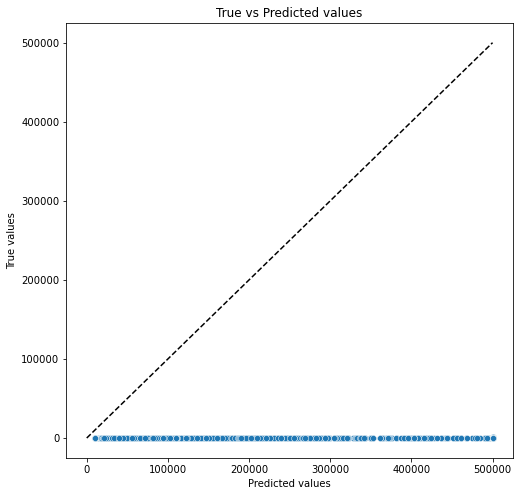

In [343]:
lr_model = LinearRegression()
# y_train_log = np.log(y_train)
lr_model.fit(X_train, y_train)
# y_train
y_train_preds = lr_model.predict(X_train)
# # Постпроцессинг
y_train_preds = np.exp(y_train_preds)
y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=500000)


evaluate_preds(y_train, y_train_preds)

R2:	-31032347.598
RMSE:	305830.983
MSE:	93532590144.311


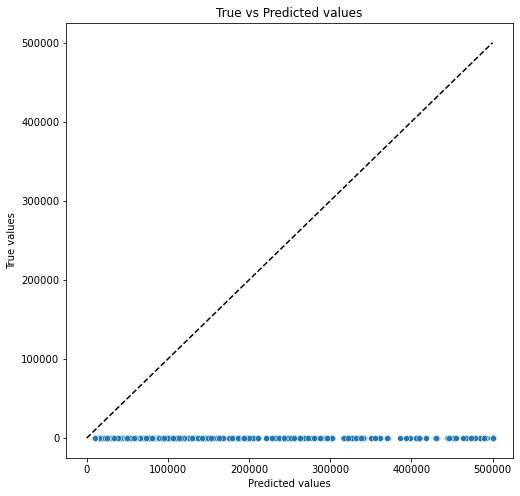

In [344]:
y_test_preds = lr_model.predict(X_test)

# Постпроцессинг
y_test_preds = np.exp(y_test_preds)
y_test_preds = np.clip(y_test_preds, a_min=10000, a_max=500000)

evaluate_preds(y_test, y_test_preds)

### 5.2 Decision tree

Подробнее можно почитать [здесь](https://habr.com/ru/company/ods/blog/322534/)

На примере задачи: _Сколько времени человек потратит на онлайн игры?_  (0 - 24 часа/день)

<img src='images/dt_explained.png'>

- age < 15 and is_male > 0.5 ---> 5
- age < 15 and is_male <= 0.5 ---> 0
- age >= 15 ---> 1

Decision tree может моделировать зависимости такого вида:

<img src='images/dt_example.png'>

R2:	0.773
RMSE:	27.854
MSE:	775.87


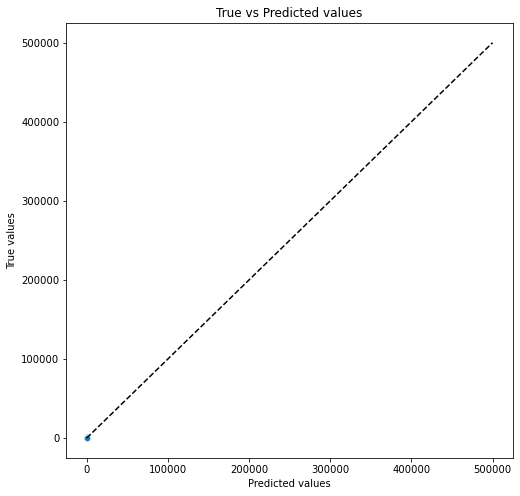

In [345]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=20, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.677
RMSE:	31.212
MSE:	974.162


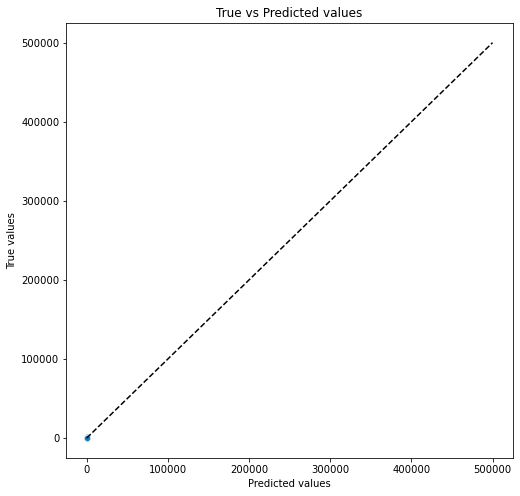

In [346]:
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### 5.3 Random Forest

Про лес подробнее можно почитать [здесь](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

**Независимо** строятся N деревьев. Их **предсказания усредняются**

Чтобы деревья получались разными добавляют элемент случайности:
- каждое дерево строят на подвыборке данных (случайно сэмплируют 70% данных)
- каждое дерево строят на подвыборке фич (случайно сэмплируют 70% фич)
- ...

<img src='images/rf_explained.png'>

Бутстрэп - выбираем из обучающей выборки k объектов с возвращением.
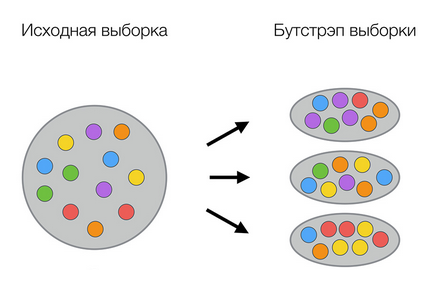
Бэггинг - Бутстрэп-агрегирование<br>
Про бэггинг и бутстрэп можно почитать [здесь](https://habr.com/ru/company/ods/blog/324402/)

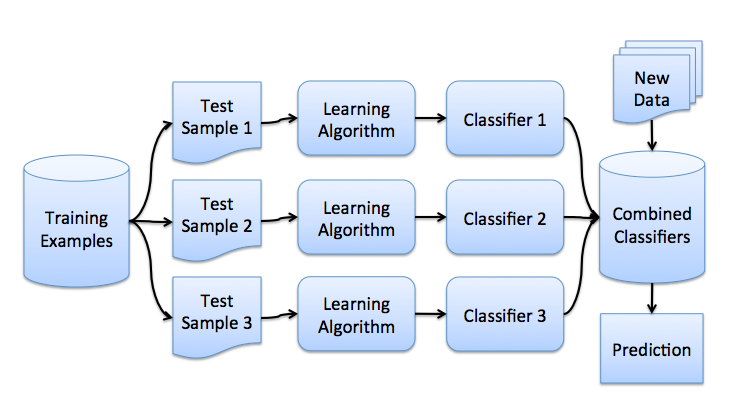

R2:	0.744
RMSE:	29.611
MSE:	876.794


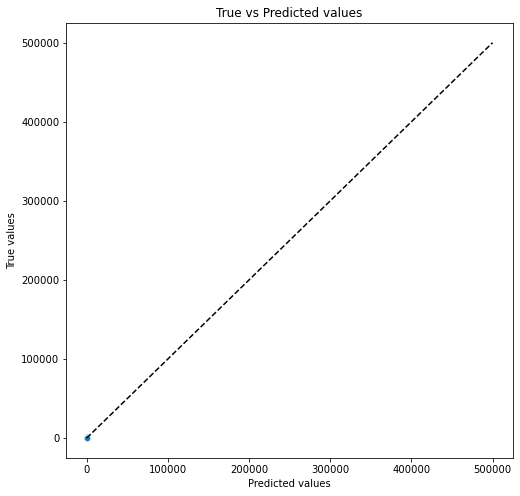

In [347]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.664
RMSE:	31.821
MSE:	1012.585


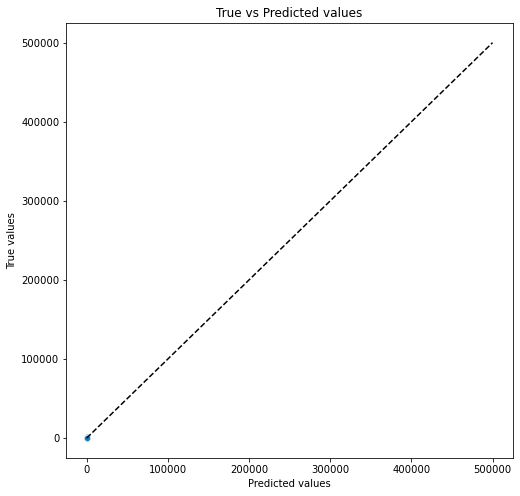

In [348]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### 5.4 Gradient Boosting decision trees

Подробнее можно почитать [здесь](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)

**Последовательно** строятся N деревьев: новое дерево обучается на ошибках предыдущих. **Предсказания деревьев суммируются**

R2:	0.924
RMSE:	16.123
MSE:	259.966


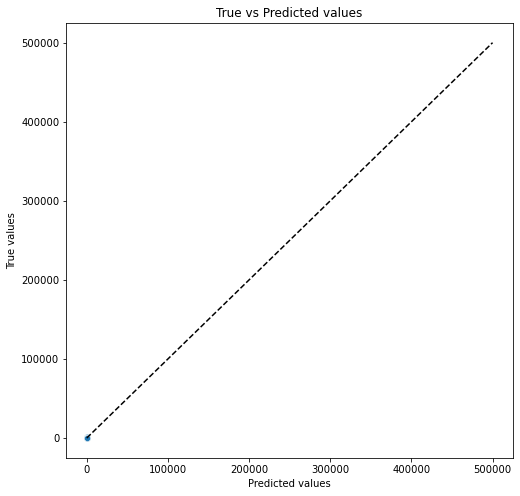

In [349]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=30,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.718
RMSE:	29.171
MSE:	850.955


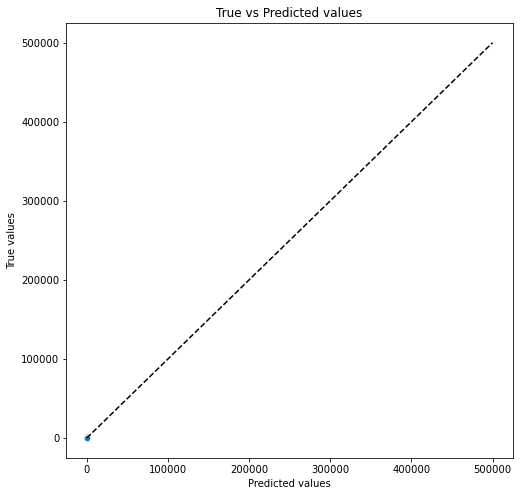

In [350]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

# Шаг 6.** Настройка и оценка финальной модели

!!!  кросс-валидация проходит на трейне, test не трогаем  !!!

[Кросс валидация](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) и подбор гиперпараметров

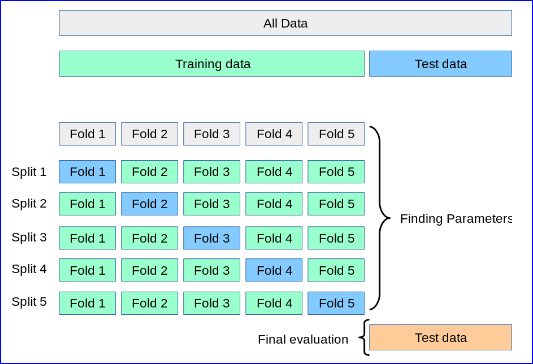

In [351]:
X_train.shape[0] // 5

2891

In [352]:
gb_model = GradientBoostingRegressor(criterion='mse',
                          # min_samples_leaf=10,
                          random_state=42,
                         # n_estimators=100,
                         # max_depth=7
                         )

In [353]:
%%time
params = {'n_estimators':[100, 200, 400], 
          'min_samples_leaf':[15, 20, 30],
          'max_depth':[3, 5, 15, 20]}

gs = GridSearchCV(gb_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

KeyboardInterrupt: 

In [354]:
res = pd.DataFrame(gs.cv_results_)
res.head(5)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

**Обучение и оценка модели**

In [ ]:
%%time
final_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=15,
                                        min_samples_leaf=20,
                                        random_state=42,  
                                        n_estimators=400)

final_model.fit(X_train, y_train)

y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [ ]:
%%time
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds, save=True)

# Шаг 7.* Анализ прогнозов

**Важность признаков**

In [ ]:
final_model.feature_importances_ 

In [ ]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

**Топ-3 фичи**

In [ ]:
feature_importances.head(10)

**Худшие 3 фичи**

In [ ]:
feature_importances.tail(10)

In [ ]:
feature_importances.to_csv(REPORTS_FILE_PATH + str(target_name + '_'+'feature_importances.csv'), index=False)

# Шаг 8. Сохранение модели

In [ ]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [ ]:
with open(MODEL_FILE_PATH, 'rb') as file:
    my_model = pickle.load(file)
    
my_model

In [ ]:
import sklearn
print(sklearn.__version__)

# Обобщение 

----

## $$Метрики$$
<img src='images/classif&regr.png'>

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
X = X_train
y = y_train
# X = [[1, 2, 3], [1, 2, 3], [1, 2, 3]]
# y = [0, 1, 1]
knn = KNeighborsClassifier(n_neighbors=1)
# c = BaggingClassifier(knn, base_estimator=100)
c = BaggingClassifier(knn)
c.fit(X, y)
c.predict(X)

[Машинное обучение для людей](https://zen.yandex.ru/media/id/5c228ab268a70a00adaf792a/mashinnoe-obuchenie-dlia-liudei-5c23782132121100a94a4417)
<img src=https://avatars.mds.yandex.net/get-zen_doc/1056701/pub_5c23782132121100a94a4417_5c2378bab8997d00a95fbbcc/scale_2400 width=800px>

# xgboost 


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

___________
<img src='images/ds_pipeline.png'>

In [ ]:
# final_model = xgb.XGBRegressor(verbosity=0)

# final_model.fit(X_train, y_train)

# y_train_preds = final_model.predict(X_train)
# evaluate_preds(y_train, y_train_preds)

In [ ]:
final_model = xgb.XGBRegressor(verbosity=0) 
print(final_model)

In [ ]:
final_model.fit(X_train, y_train)

In [ ]:
score = final_model.score(X_train, y_train)  
print("Training score: ", score)

In [ ]:
scores = cross_val_score(final_model, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(final_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
ypred = final_model.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))





In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize = (16, 8))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()


Кросс валидация и подбор гиперпараметров

In [ ]:
xgb1 = XGBRegressor()

здесь все: https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [ ]:
%%time
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear', 'reg:squarederror'],
              'learning_rate': [.03, 0.05, 0.01,  .07, 0.045, 0.06], #so called `eta` value
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'min_child_weight': [2, 3, 4, 5],
              'silent': [1],
              'subsample': [0.7, 0.5, 0.55, 0.6, 0.2, 0.3, 0.8, 0.4],
              'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
              'n_estimators': [50, 100,200,400,500, 650,750,800]}

parameters = { 'max_depth': [6,9,10],
              'objective':['reg:linear'],
           'learning_rate': [0.05, 0.08, 0.1],
           'n_estimators': [500, 800, 1000],
           'colsample_bytree': [0.3, 0.7],
             'subsample': [0.7, 0.8]
             }

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        scoring='neg_mean_squared_error',
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

In [ ]:
res = pd.DataFrame(xgb_grid.cv_results_)
res.head(5)

In [ ]:
xgb_grid.best_params_

In [ ]:
final_model = xgb.XGBRegressor(colsample_bytree = 0.7,
 learning_rate = 0.05,
 max_depth= 10,
 min_child_weight= 5,
 n_estimators= 1000,
 nthread= 4,
 objective= 'reg:linear',
 silent= 1,
 subsample= 0.8,
verbosity=0) 

final_model.fit(X_train, y_train)

In [ ]:
ypred = final_model.predict(X_train)
mse = mean_squared_error(y_train, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(round(r2(y_train, ypred), 3))


In [ ]:
ypred = final_model.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(round(r2(y_test, ypred), 3))


In [ ]:
final_time = float(time.time())
total_time = final_time - start_time
print('Общее затраченое время сек', total_time)

In [ ]:
sec = total_time
ty_res = time.gmtime(sec)
res = time.strftime("%H:%M:%S",ty_res)
print('Общее затраченое время', res)